In [1]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Some insight about Data

In [2]:
df = pd.read_csv('retail_sales_dataset.csv', encoding = 'unicode_escape')

In [3]:
df.shape

(1000, 9)

In [4]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [6]:
file_path = 'retail_sales_dataset.csv'
sales_data = pd.read_csv(file_path)
mean = sales_data['Total Amount'].mean()
median = sales_data['Total Amount'].median()
mode = sales_data['Total Amount'].mode()[0]
std = sales_data['Total Amount'].std()
basic_statistics = {
    'Mean of total amount': mean,
    'Median of total amount': median,
    'Mode of total amount': mode,
    'Standard Deviation of total amount': std
}

print(basic_statistics)

{'Mean of total amount': 456.0, 'Median of total amount': 135.0, 'Mode of total amount': 50, 'Standard Deviation of total amount': 559.997631555123}


# DATA CLEANING

In [7]:
pd.isnull(df)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False


In [8]:
pd.isnull(df).sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [9]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


# Exploratory Data Analysis

# Gender

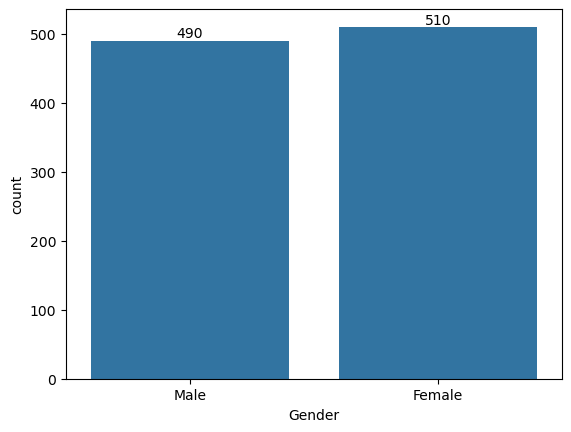

In [10]:
ax = sns.countplot(x = 'Gender',data = df)
for bars in ax.containers:
    ax.bar_label(bars)

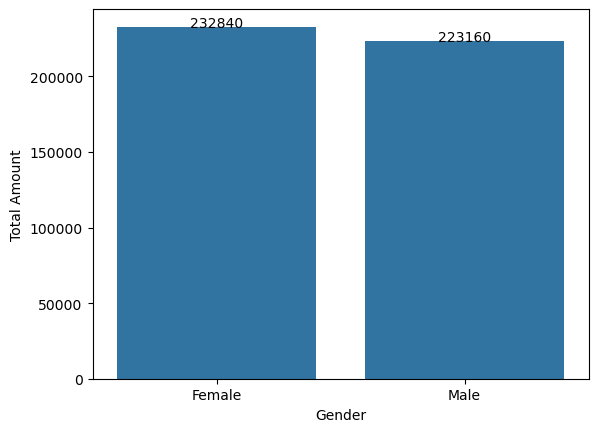

In [11]:
sales_gen = df.groupby(['Gender'], as_index=False)['Total Amount'].sum().sort_values(by='Total Amount', ascending=False)
sns.barplot(x='Gender', y='Total Amount', data=sales_gen)
for index, row in sales_gen.iterrows():
    plt.text(index, row['Total Amount'], row['Total Amount'], color='black', ha="center")
plt.show()

***From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than males.***

# AGE

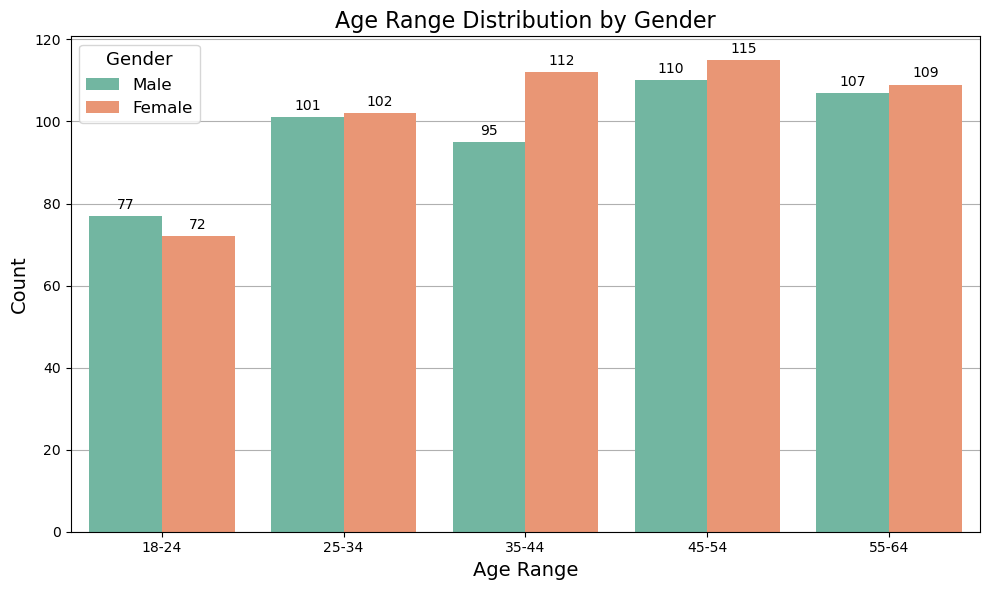

In [12]:
bins = [18, 25, 35, 45, 55, 65]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64']
df['Age Range'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Age Range', hue='Gender', palette='Set2')

ax.set_title('Age Range Distribution by Gender', fontsize=16)
ax.set_xlabel('Age Range', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.legend(title='Gender', fontsize=12, title_fontsize='13')
for bars in ax.containers:
    ax.bar_label(bars, fontsize=10, padding=3)
ax.yaxis.grid(True)
ax.set_axisbelow(True)
plt.tight_layout() 
plt.show()

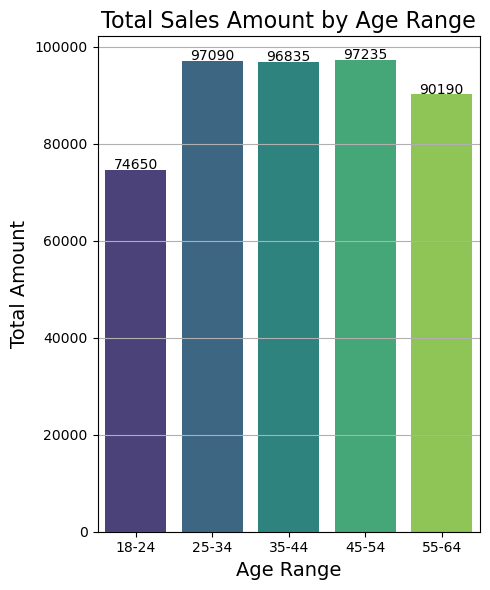

In [13]:
sales_age_range = df.groupby('Age Range', as_index=False, observed=False)['Total Amount'].sum()
plt.figure(figsize=(5, 6))
sns.barplot(x='Age Range', y='Total Amount', data=sales_age_range, hue='Age Range', palette='viridis', legend=False)
plt.title('Total Sales Amount by Age Range', fontsize=16)
plt.xlabel('Age Range', fontsize=14)
plt.ylabel('Total Amount', fontsize=14)
for index, row in sales_age_range.iterrows():
    plt.text(index, row['Total Amount'] + 100, f'{row["Total Amount"]}', ha='center', fontsize=10)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

***From above graphs,we can say that most of the buyers are of age group between 45-54 yrs females.***

# PRODUCT CATEGORY 

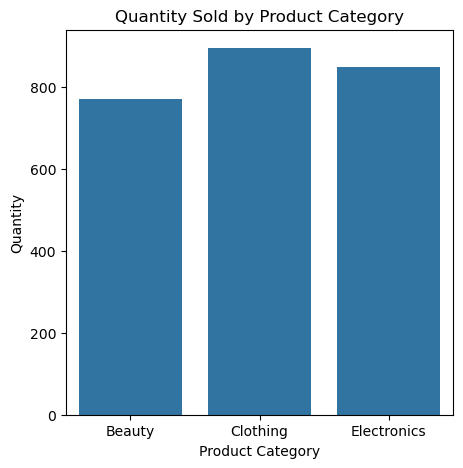

In [14]:
plt.figure(figsize=(5, 5))
sns.barplot(x='Product Category', y='Quantity', data=df.groupby('Product Category')['Quantity'].sum().reset_index())
plt.title('Quantity Sold by Product Category')
plt.show()

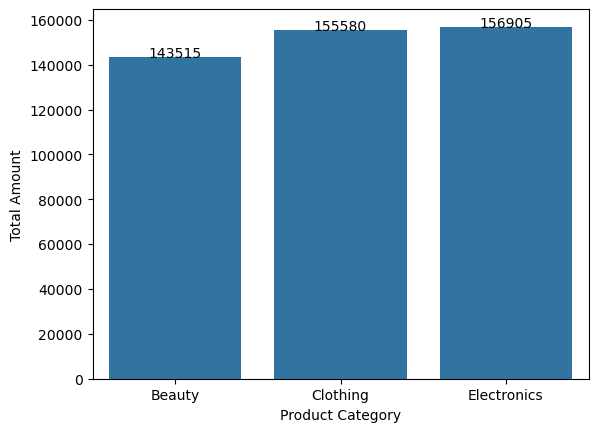

In [15]:
sales_gen = df.groupby(['Product Category'], as_index=False)['Total Amount'].sum().sort_values(by='Total Amount', ascending=True)
sns.barplot(x='Product Category', y='Total Amount', data=sales_gen)
for index, row in sales_gen.iterrows():
    plt.text(index, row['Total Amount'], row['Total Amount'], color='black', ha="center")
plt.show()

***From above graphs, we can say that quantity sold by Clothing product is less, but Total amount sell by Electronics product are more.***

# MONTHLY TRENDS(Time Series Analysis)

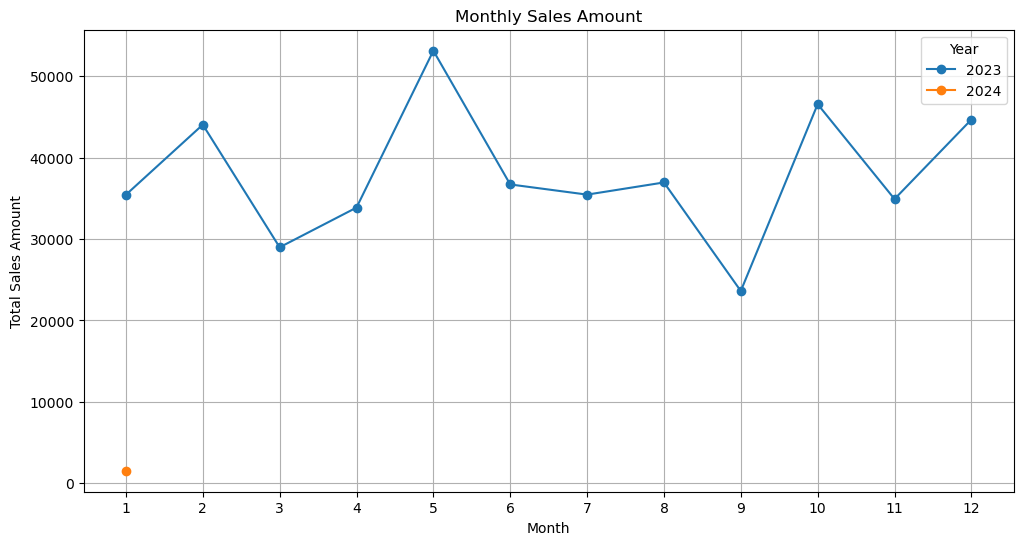

Year             2023
Month               5
Total Amount    53150
Name: 4, dtype: int64


In [16]:
sales_data['Date'] = pd.to_datetime(sales_data['Date'])
sales_data['Month'] = sales_data['Date'].dt.month
sales_data['Year'] = sales_data['Date'].dt.year
monthly_sales = sales_data.groupby(['Year', 'Month'])['Total Amount'].sum().reset_index()
plt.figure(figsize=(12, 6))
for year in monthly_sales['Year'].unique():
    data = monthly_sales[monthly_sales['Year'] == year]
    plt.plot(data['Month'], data['Total Amount'], marker='o', label=year)
plt.title('Monthly Sales Amount')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.legend(title='Year')
plt.grid(True)
plt.xticks(range(1, 13))
plt.show()
best_month = monthly_sales.loc[monthly_sales['Total Amount'].idxmax()]
print(best_month)

***From above graph we can say that May 2023 had maximum sale.***

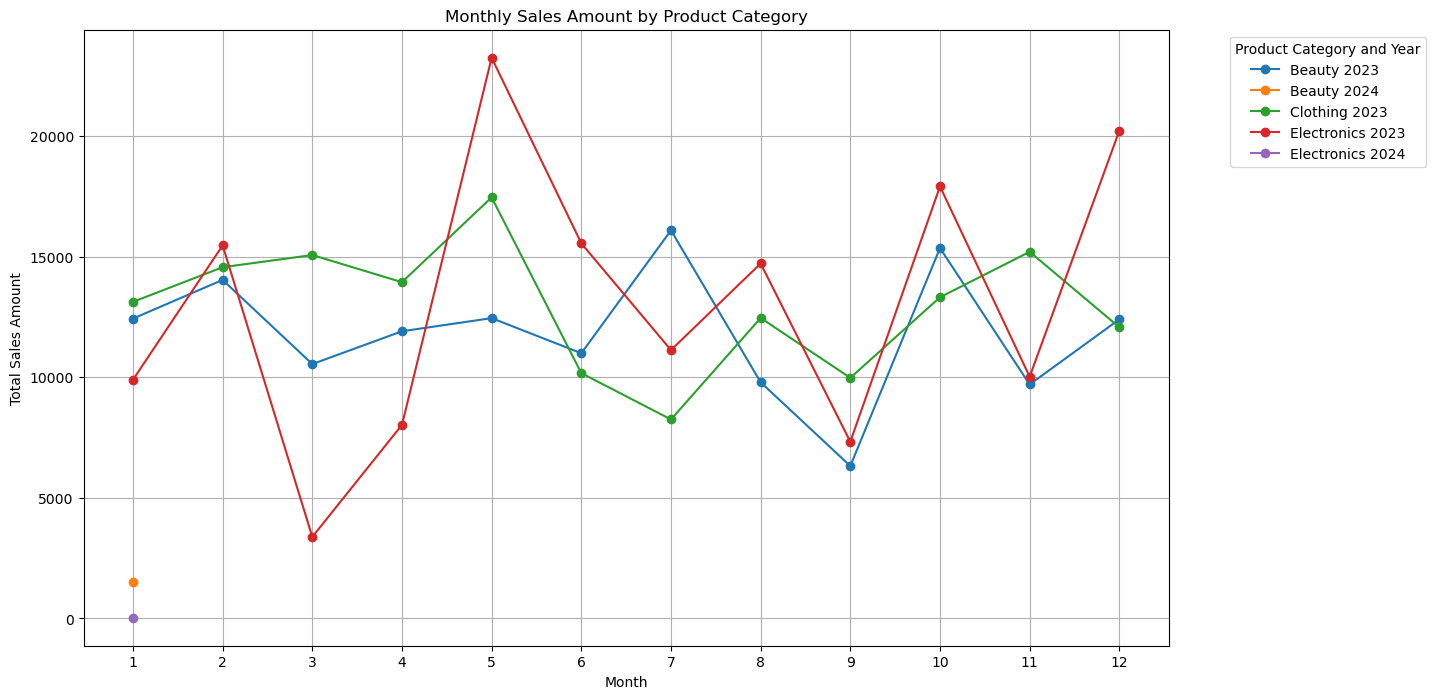

In [17]:
category_monthly_sales = sales_data.groupby(['Product Category', 'Year', 'Month'])['Total Amount'].sum().reset_index()
plt.figure(figsize=(14, 8))
categories = category_monthly_sales['Product Category'].unique()
for category in categories:
    data = category_monthly_sales[category_monthly_sales['Product Category'] == category]
    for year in data['Year'].unique():
        yearly_data = data[data['Year'] == year]
        plt.plot(yearly_data['Month'], yearly_data['Total Amount'], marker='o', label=f'{category} {year}')
plt.title('Monthly Sales Amount by Product Category')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.legend(title='Product Category and Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(range(1, 13))
plt.show()

***From Above graph we can say that Electronic Sale is maximum in May, Beauty sale is max. in July and Clothing Sale is max in May.***

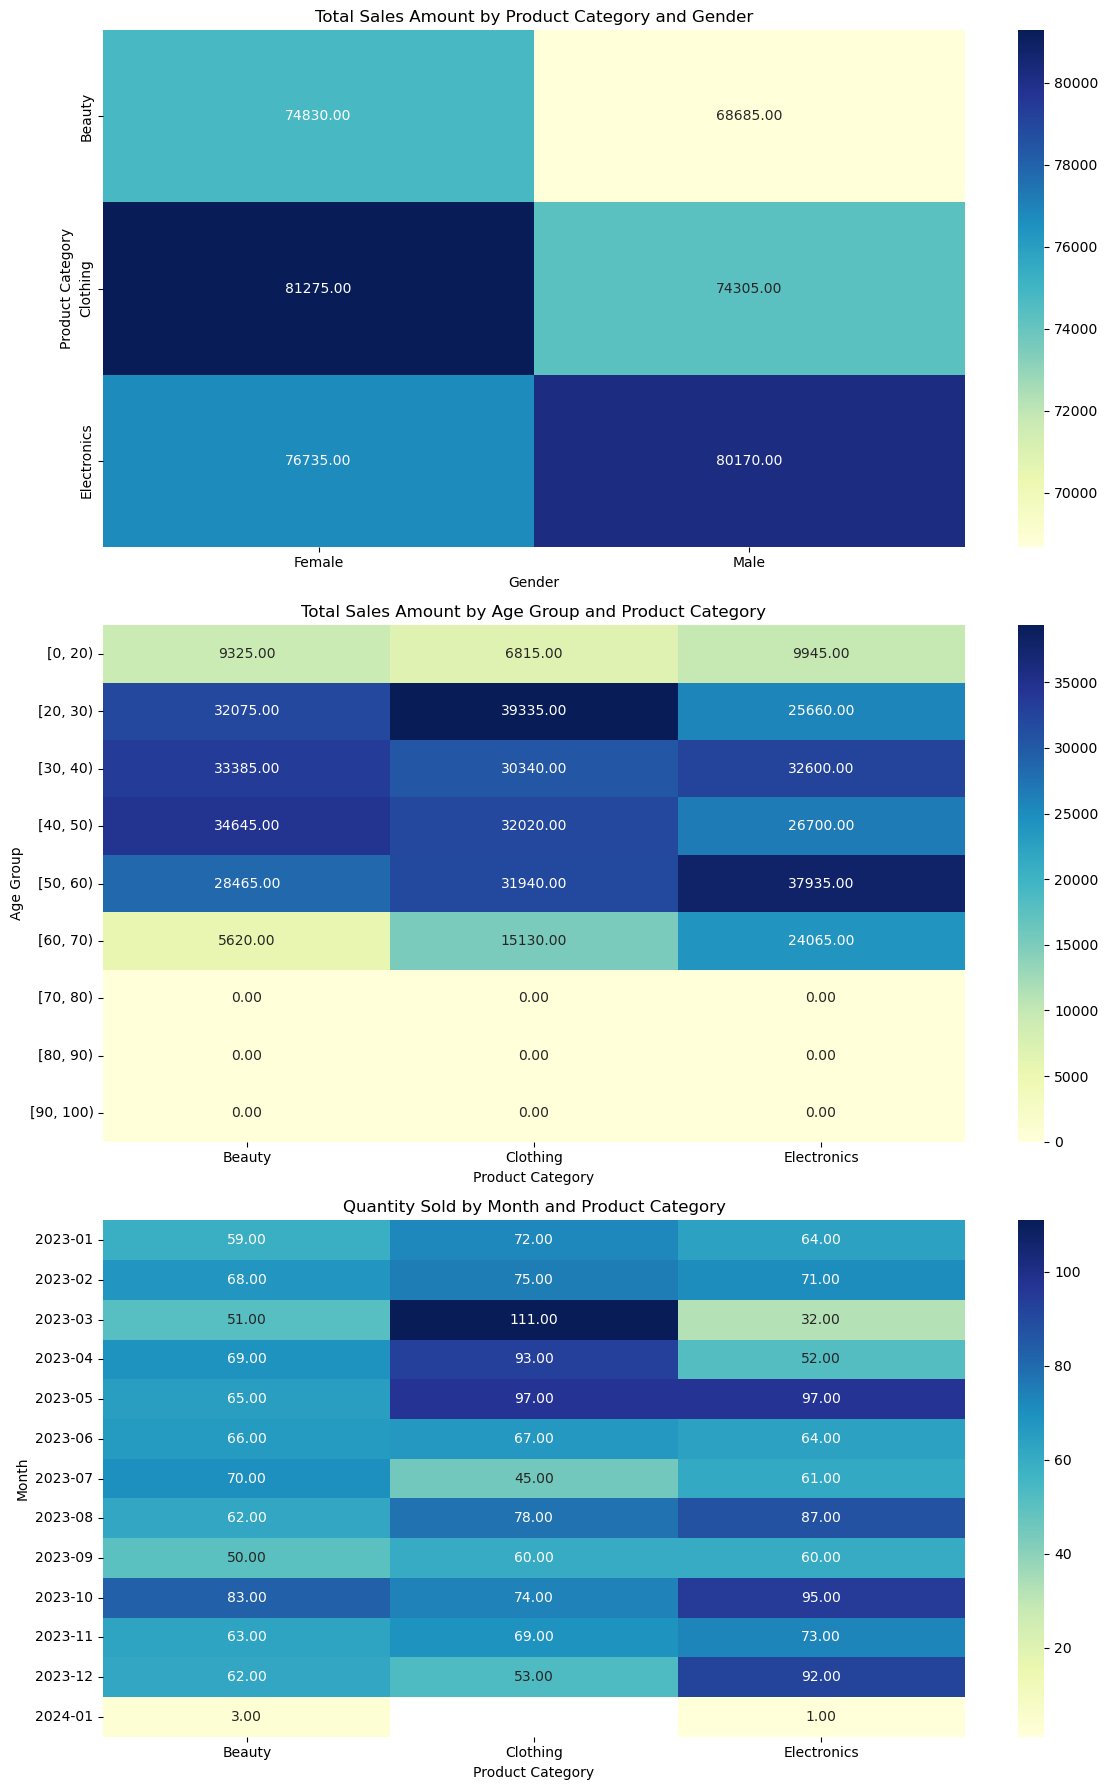

In [18]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')
sales_category_gender = df.pivot_table(values='Total Amount', index='Product Category', columns='Gender', aggfunc='sum')
df['Age Group'] = pd.cut(df['Age'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 90, 100], right=False)
sales_age_category = df.pivot_table(values='Total Amount', index='Age Group', columns='Product Category', aggfunc='sum', observed=False)
quantity_month_category = df.pivot_table(values='Quantity', index='Month', columns='Product Category', aggfunc='sum')
fig, axs = plt.subplots(3, 1, figsize=(12, 18))
sns.heatmap(sales_category_gender, annot=True, fmt='.2f', cmap='YlGnBu', ax=axs[0])
axs[0].set_title('Total Sales Amount by Product Category and Gender')
sns.heatmap(sales_age_category, annot=True, fmt='.2f', cmap='YlGnBu', ax=axs[1])
axs[1].set_title('Total Sales Amount by Age Group and Product Category')
sns.heatmap(quantity_month_category, annot=True, fmt='.2f', cmap='YlGnBu', ax=axs[2])
axs[2].set_title('Quantity Sold by Month and Product Category')
plt.tight_layout()
plt.show()

***From Heatmap 1 : Electronics and Clothing have higher sales amounts, with significant gender differences in Clothing and Beauty.***

***From Heatmap 2 : Younger consumers prefer Electronics and Clothing, while older age groups exhibit varied spending patterns.***

***From Heatmap 3 : Categories show peak sales in specific months, indicating seasonal demand trends.***

# CONCLUSION 

From the analysis, the mean, median, mode, and standard deviation of the total amount are 456.00, 135.00, 50.00, and 559.99, respectively. Females dominate in both number of buyers and spending, with the majority being aged 45-54. Electronics products lead in total sales amount, while Clothing has fewer units sold. May 2023 had the highest overall sales, with Electronics peaking in May, Beauty in July, and Clothing in May. Heatmaps reveal that Electronics and Clothing have higher sales amounts, with notable gender differences in Clothing and Beauty. Younger consumers prefer Electronics and Clothing, while older age groups exhibit varied spending patterns. Lastly, sales peaks in specific months indicate clear seasonal demand trends for different product categories.

# RECOMMENDATIONS

Based on the retail dataset analysis, focus marketing on females in Clothing and Beauty categories, with personalized campaigns for ages 45-54. Ensure ample Electronics stock in peak months like May, use discounts for Clothing sales. Align promotions seasonally, tailor strategies for Clothing and Beauty by gender. Launch loyalty programs for frequent female buyers aged 45-54. Continuously refine assortments based on sales data for optimal availability and profitability.

**Name - ANSHUK KUMAR SWARNKAR**

Email - anshukswarnkar559@gmail.com

THANK YOU
